# Differentialligningssystemer
Demo af Christian Mikkelstrup og Hans Henrik Hermansen

In [1]:
from sympy import *
init_printing()

## Homogene systemer af første ordens lineære diff-ligninger

## 1. Systemmatricen har to reelle egenværdier
Givet differentialligningsystemet

\begin{gather*}
    \frac{\text{d}}{\text{d}t}x_1(t) = 5x_1(t) - 3x_2(t)\\
    \frac{\text{d}}{\text{d}t}x_2(t) = 6x_1(t) - 4x_2(t)
\end{gather*}

### a. Simuleret håndregning via diagonaliseringsmetoden
Først løser vi systemet i hånden vha. diagonaliseringsmetoden, dvs. vi opstiller og analyserer systemmatricen

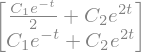

In [2]:
t,C1,C2 = symbols("t C1:3")
A = Matrix([[5,-3],[6,-4]])
ev = A.eigenvects()
res = C1 * E ** (ev[0][0]*t) * ev[0][2][0] + C2 * E ** (ev[1][0]*t) * ev[1][2][0]
res

### b. via dsolve
Vi kan også finde løsningen direkte med dsolve

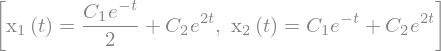

In [3]:
x1 = Function("x1")
x2 = Function("x2")
eq1 = Eq(diff(x1(t),t),5 * x1(t) - 3 * x2(t))
eq2 = Eq(diff(x2(t),t),6*x1(t) - 4*x2(t))

dsolve([eq1, eq2])

## 2. Systemmatricen har to komplekse egenværdier
Givet differentialligningssystemet
\begin{gather*}
    \frac{\text{d}}{\text{d}t}x_1(t) = 2x_1(t) + 2x_2(t)\\
    \frac{\text{d}}{\text{d}t}x_2(t) = -x_1(t) + 4x_2(t)
\end{gather*}

## a. Simuleret håndregning
Fremgangsmåden her er den samme.

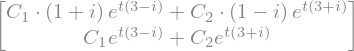

In [4]:
A = Matrix([[2,2],[-1,4]])
ev = A.eigenvects()
res = C1 * E ** (ev[0][0]*t) * ev[0][2][0] + C2 * E ** (ev[1][0]*t) * ev[1][2][0]
res

Nu finder vi også den fuldstændige reelle løsning vha. metode 17.5

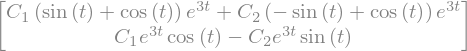

In [5]:
a = re(ev[0][0])
b = im(ev[0][0])
re_ev = re(ev[0][2][0])
im_ev = im(ev[0][2][0])
u1 = E ** (a * t) * (cos(b * t) * re_ev - sin(b * t) * im_ev)
u2 = E ** (a * t) * (sin(b * t) * re_ev + cos(b * t) * im_ev)
C1 * u1 + C2 * u2

### b. Med dsovle

In [6]:
eq1 = Eq(diff(x1(t),t),2*x1(t) + 2*x2(t))
eq2 = Eq(diff(x2(t),t),-x1(t) + 4*x2(t))

dsolve([eq1, eq2])

Selvom løsningerne ser lidt forskellige ud, så er de lig hinanden.

## 3. Betinget løsning med plot
Lad os se på systemet fra eksempel 1 igen.
\begin{gather*}
    \frac{\text{d}}{\text{d}t}x_1(t) = 5x_1(t) - 3x_2(t)\\
    \frac{\text{d}}{\text{d}t}x_2(t) = 6x_2(t) - 4x_2(t)
\end{gather*}

Vi kom frem til den fuldstændige løsning
\begin{gather*}
    \begin{bmatrix} x_1(t) \\ x_2(t) \end{bmatrix} = C_1 e^{-t} \begin{bmatrix}1 \\ 2\end{bmatrix} + C_2 e^{2t} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\end{gather*}

Lad os finde et $C_1$ og $C_2$, der medfører at $x_1(0) = 2$ og $x_2(0) = 3$.

### a. Simuleret håndregning
Først finder vi lige løsningen igen

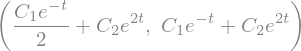

In [7]:
t,C1,C2 = symbols("t C1:3")
A = Matrix([[5,-3],[6,-4]])
ev = A.eigenvects()
fuld = C1 * E ** (ev[0][0]*t) * ev[0][2][0] + C2 * E ** (ev[1][0]*t) * ev[1][2][0]
x1_fuld, x2_fuld = fuld[0],fuld[1]
x1_fuld, x2_fuld

Nu kan løse for $c_1$ og $c_2$


In [8]:
solve([Eq(x1_fuld.subs(t,0),2),Eq(x2_fuld.subs(t,0),3)])


Vi kunne også gøre dette med $\text{dsolve}$

In [9]:
eq1 = Eq(diff(x1(t),t),5 * x1(t) - 3 * x2(t))
eq2 = Eq(diff(x2(t),t),6*x1(t) - 4*x2(t))

dsolve([eq1, eq2],ics={x1(0) : 2, x2(0) : 3})

Nu, hvor vi har fundet $c_1$ og $c_2$, kan vi plotte vores løsning.

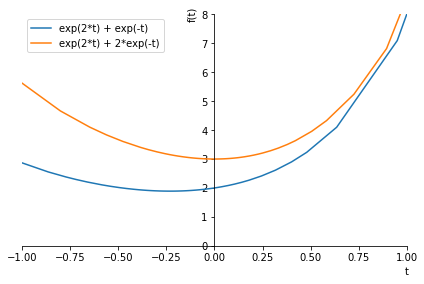

In [10]:
plot(x1_fuld.subs([(C1,2),(C2,1)]),x2_fuld.subs([(C1,2),(C2,1)]),xlim=(-1,1),ylim=(0,8),legend=True)